Today, we're going to discuss some ways that we can improve on linear regression while still keeping the functional form of linear regression. Surprisingly, linear regression can still compete with more advanced techniques if you use some of these additional methods.

So, why would we want to consider these alternative methods?

 * **Model accuracy**: especially in cases when the number of features (p) is not much lower than the number of observations (n), the variability in the model will make linear regression a poor fit. In cases when p > n, we can't even use regression, because the variance is infinite-- there is no longer a unique LSR estimate.
 
 * **Model interpretability**: this is where these methods really shine. If you can get rid of some of the extra features that contribute little or nothing to the output, you can get much simpler models.

We are going to examine three different methods:

* **Subset selection** uses a method to identify a subset of p features and use those for regression.

* **Shrinkage** still uses all the predictors, but some coefficients are *shrunken* towards zero, a process also known as **regularization**. We'll look at a couple types of this.

* **Dimension reduction** projects p predictors into M-dimensional space, where M is less than p. Think of it as projecting a 3D dataset into 2D space.

Let's first do a regular multiple linear regression on an example dataset:

In [1]:
#A bunch of libraries and packages 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xlrd

from sklearn import linear_model
from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
%matplotlib inline

In [2]:
# UCI ML database - energy efficiency
# Database of many ML data available here: https://archive.ics.uci.edu/ml/

UCI_energy = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')

# definition of dataframes 
# X1	Relative Compactness 
# X2	Surface Area 
# X3	Wall Area 
# X4	Roof Area 
# X5	Overall Height 
# X6	Orientation 
# X7	Glazing Area 
# X8	Glazing Area Distribution 
# y1	Heating Load 
# y2	Cooling Load

In [3]:
UCI_energy = UCI_energy.rename(columns={'X1':'Relative Compactness', 'X2':'Surface Area', 'X3':'Wall Area', 'X4':'Roof Area', 'X5':'Overall Height',
                           'X6':'Orientation', 'X7':'Glazing Area', 'X8':'Glazing Area Distribution', 'Y1':'Heating Load',
                           'Y2':'Cooling Load'})

In [4]:
UCI_energy.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Let's do a test/train split before going further. As a note, remember that a single test-train split isn't good practice. Recall from our last lecture how to implement bootstrapping or cross-validation methods.

In [5]:
train,test = train_test_split(UCI_energy, test_size=0.05, random_state=1010)

# Part 1: Multiple Linear Regression

Train error 8.233946585244846
Test error 13.905810081799487


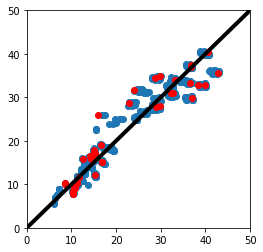

In [6]:
# train linear model 
MLR=linear_model.LinearRegression()
MLR.fit(train[train.columns.values[0:8]],train[train.columns.values[8]])

# make predictions on test and train set 
trainpred=MLR.predict(train[train.columns.values[0:8]])
testpred=MLR.predict(test[train.columns.values[0:8]])

#make parity plot 
plt.figure(figsize=(4,4))
plt.xlim([0,50]);
plt.ylim([0,50]);
plt.scatter(train[train.columns.values[8]],trainpred)
plt.scatter(test[train.columns.values[8]],testpred,color='r')
plt.plot([0,50],[0,50],lw=4,color='black')

#calculate the test and train error
print("Train error",mean_squared_error(train[train.columns.values[8]],trainpred))
print("Test error",mean_squared_error(test[train.columns.values[8]],testpred))